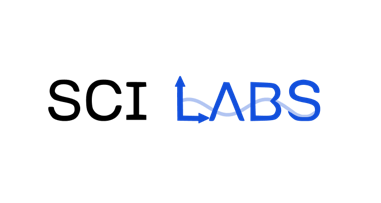

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Einsteinova Nobelova cena - fotoelektrický jav

Einstein sa preslávil hlavne svojou špeciálnou (1905) a všeobecnou (1915) teóriou relativity. Predsa takmer každý (aj nefyzik!) pozná jeho slávnu rovnicu $E = mc^2$. Mnohí si dokonca milne myslia, že Nobelovu cenu, ktorú získal v roku 1921 získal práve vďaka svojej práci na týchto teóriách zaoberajúcich sa časopriestorom. Lenže to tak nie je! Nobelovu cenu totiž dostal za "vysvetlenie fotoelektrického javu a za zásluhy o teoretickú fyziku". A čo je to fotoelektrický dej, za ktorý dostal Albert Einstein Novu cenu? Na to sa pozrieme v tomto cvičení.

https://sk.wikipedia.org/wiki/Fotoelektrick%C3%BD_jav \
https://sk.wikipedia.org/wiki/Albert_Einstein \
https://en.wikipedia.org/wiki/Photoelectric_effect

Na začiatku 20. storočia už fyzici vedeli, že pokiaľ sa posvieti elektromagentickým žiarením (napr. ultrafialovým svetlom) na určité materiály (najmä kovy), tak sa z nich uvoľnia elektróny. Čím menšia je frekvencia žiarenia, tým väčšiu kinetickú energiu uvoľnené elektróny majú. V roku 1905 Einstein prišiel s teoretickým vysvetlením tohto javu. V jeho teórii je elektromagentické žiarenie tvorené časticami (fotónmi), kde každá častica má energiu priamo úmernú frekvenciu tohto žiarenia podľa vzťahu

\begin{equation*}
 E_f = hf,
\end{equation*}

kde konštanta úmernosti $h = 6.62607015 \cdot 10^{-34} \text{ J}\cdot\text{Hz}^{-1}$ je Planckova konštanta.

Einesten navrhol, že energia najrýchlejších elektrónov $E$, ktoré materiál opúšťajú sa riadia podľa vzťahu

\begin{equation*}
 E = E_f - W = hf - W,
\end{equation*}

kde $W$ je tzv. výstupná práca materiálu - minimálna energia potrebná na uvoľnenie elektrónu z materiálu. Toto teoretické vysvetlenie súhlasilo s experimentom a zároveň položilo základ kvantovej fyziky. Preto nie je prekvapujúce, že práve za objasnenie fotoelektrického javu dostal Albert Einstein Nobelovu cenu.

In [ ]:
data = pd.read_table("data.txt", header = None)
data = data.rename(columns={0: "Prvok", 1: "W [eV]"})

Popis načítaných údajov:
- Prvok - značka chemického prvku,
- W [eV] $W$ - Výstupná práca daného materiálu

Výstupná práca a energia elektrónov sa často udáva v elektrónvoltoch - $1 \text{ eV} = 1.602 \cdot 10^{-19} \text{ J}$, takže aj pri tejto úlohe si budeme musieť dávať pozor na jednotky!

Zostrojíme grafy závslosti kintecikej energie elektrónov $E$ na frekvencii $f$ fotónov.

In [ ]:
#Načítame si výstupné práce niekoľkých kovov

W_Cu = float(data[data["Prvok"] == "Cu"]["W [eV]"].values[0])
W_Au = float(data[data["Prvok"] == "Au"]["W [eV]"].values[0])
W_Si = float(data[data["Prvok"] == "Si"]["W [eV]"].values[0])
W_K = float(data[data["Prvok"] == "K"]["W [eV]"].values[0])
W_Ag = float(data[data["Prvok"] == "Ag"]["W [eV]"].values[0])

In [ ]:
h = 6.62607015e-34              # Planckova konstanta [J.s]

def photo_eff(f, W):
    return(h*f/1.602e-19 - W)   # Prevedieme energiu fotonu na elektronvolty

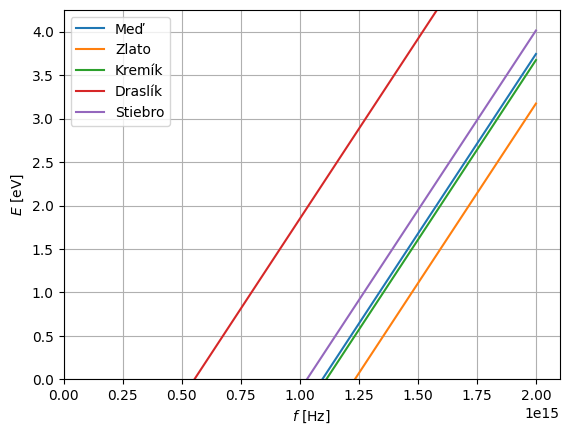

In [ ]:
f = np.linspace(0, 2e15, 1000)                                      # Rozsah frekvenci [Hz]


plt.plot(f, photo_eff(f, W_Cu), label = "Meď", zorder = 2)
plt.plot(f, photo_eff(f, W_Au), label = "Zlato", zorder = 2)
plt.plot(f, photo_eff(f, W_Si), label = "Kremík", zorder = 2)
plt.plot(f, photo_eff(f, W_K), label = "Draslík", zorder = 2)
plt.plot(f, photo_eff(f, W_Ag), label = "Stiebro", zorder = 2)


plt.grid()

plt.ylabel("$E$ [eV]")
plt.xlabel("$f$ [Hz]")

plt.ylim(0,4.25)
plt.xlim(0)

plt.legend()